# ABoVE Shrubs test site: JJ's bbox extent and a single TOA

In [1]:
import glob
from osgeo import gdal, ogr, osr
import geopandas as gpd
import pandas as pd
import sys, os
sys.path.append('/home/pmontesa/code/dgtools')
sys.path.append('/home/pmontesa/code/pygeotools')
import pygeotools 

sys.path.append('/home/pmontesa/code/geoscitools')
import footprintlib

# This is a private repo
from dgtools.lib import dglib

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

import contextily as ctx
import rasterio
from rasterio.plot import show, show_hist
import fiona

/tmp/ipykernel_513551/1593031049.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [4]:
# Data dirs
ak_ccdc_dir = '/explore/nobackup/people/mmacande/srlite/srlite_shared/ccdc_20230214'
dir_main_pmm = '/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs'

## Initial test site

#### intersect JJ box with TOAs

In [5]:
ak_footprint_gdf = gpd.read_file('/explore/nobackup/people/pmontesa/srlite/footprints_vhrmeta_toa_Alaska_ahri_20221004.gpkg')

In [9]:
shape_fn = dir_main_pmm + '/data/arc/' + 'jj_squares_20230420_10km_4326.shp'#'JJ_square_SewPen_20230224.shp'
shape_fn

'/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs/data/arc/jj_squares_20230420_10km_4326.shp'

In [6]:

bbox_jj = gpd.read_file(shape_fn)
bbox_jj

,rank,Name,fid_,catalog_id,year,month,day,sensor,prod_code,yyyymmdd,...,MEAN_sun_e,FIRST_acq_,FIRST_acq1,FIRST_ac_1,Shape_Leng,Shape_Area,select,utm,area_sqkm,geometry
0,18,None,0.0,103001006D0FDD00,2017.0,8.0,5.0,WV02,M1BS,20170805,...,44.850000,2017-08-05,2017.0,8.0,1.942085,0.213112,x,+init=epsg:32603,100.076473,"POLYGON ((-165.80731 61.42527, -165.80963 61.5..."
1,2,None,0.0,1040010040168B00,2018.0,7.0,19.0,WV03,M1BS,20180719,...,42.466667,2018-07-19,2018.0,7.0,1.284324,0.096492,x,+init=epsg:32603,100.070148,"POLYGON ((-163.59370 68.05498, -163.58822 68.1..."
2,6,None,0.0,1030010025522400,2013.0,8.0,20.0,WV02,M1BS,20130820,...,34.433333,2013-08-20,2013.0,8.0,1.470376,0.131260,x,+init=epsg:32603,100.063938,"POLYGON ((-163.19918 67.73269, -163.19228 67.8..."
3,11,None,0.0,10300100AAA71100,2020.0,7.0,10.0,WV02,M1BS,20200710,...,49.300000,2020-07-10,2020.0,7.0,1.170050,0.062530,x,+init=epsg:32603,100.069159,"POLYGON ((-163.78507 62.97145, -163.78133 63.0..."
4,14,None,0.0,10300100269C9900,2013.0,8.0,18.0,WV02,M1BS,20130818,...,40.520000,2013-08-18,2013.0,8.0,2.800438,0.376805,x,+init=epsg:32603,100.025546,"POLYGON ((-162.21935 62.32149, -162.21103 62.4..."
5,13,None,0.0,103001002536B400,2013.0,7.0,10.0,WV02,M1BS,20130710,...,48.828571,2013-07-10,2013.0,7.0,2.213212,0.280459,x,+init=epsg:32603,100.028634,"POLYGON ((-162.20304 63.37768, -162.19429 63.4..."
6,8,None,0.0,1030010019B16500,2012.0,7.0,6.0,WV02,M1BS,20120706,...,48.020000,2012-07-06,2012.0,7.0,2.082769,0.244975,x,+init=epsg:32603,100.077306,"POLYGON ((-165.80370 64.63721, -165.80636 64.7..."
7,7,None,0.0,1030010094740A00,2019.0,7.0,5.0,WV02,M1BS,20190705,...,47.750000,2019-07-05,2019.0,7.0,1.111306,0.061237,x,+init=epsg:32603,100.079539,"POLYGON ((-165.40194 64.47447, -165.40327 64.5..."
8,9,None,0.0,10400100425EF400,2018.0,8.0,18.0,WV03,M1BS,20180818,...,37.275000,2018-08-18,2018.0,8.0,2.352667,0.292506,x,+init=epsg:32603,100.068101,"POLYGON ((-163.58454 65.76682, -163.57960 65.8..."
9,3,None,0.0,103001001AB23900,2012.0,7.0,21.0,WV02,M1BS,20120721,...,45.300000,2012-07-21,2012.0,7.0,2.024185,0.253646,x,+init=epsg:32603,100.076194,"POLYGON ((-164.27733 64.57216, -164.27494 64.6..."


In [7]:
foot_sub = ak_footprint_gdf.to_crs(4326)[ak_footprint_gdf.to_crs(4326).intersects( bbox_jj.to_crs(4326).iloc[0].geometry)]
foot_sub.info()
ak_footprint_gdf.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5 entries, 1714 to 1891
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   footprint_name  0 non-null      object  
 1   path            5 non-null      object  
 2   file            5 non-null      object  
 3   area_km2        5 non-null      float64 
 4   area_ha         5 non-null      float64 
 5   type            5 non-null      object  
 6   name            5 non-null      object  
 7   catid           5 non-null      object  
 8   sensor          5 non-null      object  
 9   year            5 non-null      int64   
 10  month           5 non-null      int64   
 11  id              5 non-null      object  
 12  el              5 non-null      float64 
 13  az              5 non-null      float64 
 14  sunel           5 non-null      float64 
 15  sunaz           5 non-null      float64 
 16  geometry        5 non-null      geometry
dtypes: flo

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

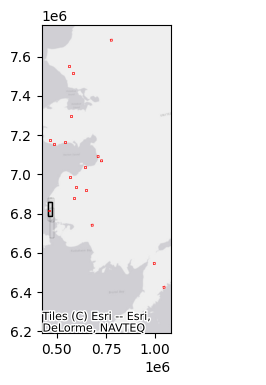

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize=(6,4)) 
EPSG_IMG = 32603 #6393
ax = foot_sub.boundary.to_crs(EPSG_IMG).plot(ax=ax, ec='k', linewidth=0.1)
ax = foot_sub[foot_sub.id == bbox_jj.catalog_id.iloc[0]].boundary.to_crs(EPSG_IMG).plot(ax=ax, ec='k', linewidth=1)
ax = bbox_jj.boundary.to_crs(EPSG_IMG).plot(ax=ax, ec='r', linewidth=0.5, label='catalog_id')
ax = ctx.add_basemap(ax, crs=EPSG_IMG, 
                source = ctx.providers.Esri.WorldGrayCanvas
            )

In [10]:
# is TOA ready?
TARGET = 'Alaska_ahri_20221004'
TARGET_DIR_TOA = f'/explore/nobackup/projects/ilab/data/srlite/toa/{TARGET}'

# Get footprints gdf from a target dir
TARGET_DIR_TOA = TARGET_DIR_TOA.rstrip('/')
print(TARGET_DIR_TOA)

f_list_toa =glob.glob(f'{TARGET_DIR_TOA}/*/*/5-toas/*103001001AB23900*.tif')
f_list_toa

/explore/nobackup/projects/ilab/data/srlite/toa/Alaska_ahri_20221004


['/explore/nobackup/projects/ilab/data/srlite/toa/Alaska_ahri_20221004/initial_output/split_8/5-toas/WV02_20120721_M1BS_103001001AB23900-toa.tif']

In [11]:
bbox_jj.to_crs(EPSG_IMG)

,Id,catalog_id,geometry
0,0,103001001AB23900,"POLYGON ((535509.749 7160239.787, 533855.576 7..."


<AxesSubplot: >

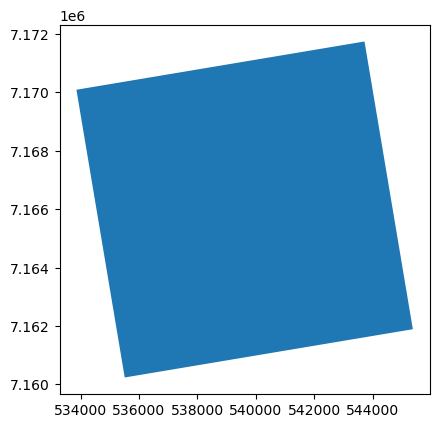

In [12]:
bbox_jj.to_crs(EPSG_IMG).plot()

### Reproject bbox to raster

In [13]:
out_bbox_reprj_fn = os.path.splitext(shape_fn)[0] + f'_epsg{EPSG_IMG}'+'.gpkg'
bbox_jj.to_crs(EPSG_IMG).to_file(out_bbox_reprj_fn, driver='GPKG') 

with fiona.open(out_bbox_reprj_fn, "r") as f:    
    print(f.crs)
    geom_list = [feature["geometry"] for feature in f]


{'init': 'epsg:32603'}


In [14]:
def pct_clip(array,pct=[2,98]):
    array_min, array_max = np.nanpercentile(array,pct[0]), np.nanpercentile(array,pct[1])
    clip = (array - array_min) / (array_max - array_min)
    clip[clip>1]=1
    clip[clip<0]=np.nan
    return clip

def COMPARE_COMPOSITE_BANDS(cog_fn, nodatavalue, stack_names, cmaps):
    
    '''Plot a row of an HLS tile's bands, each with their own colormap'''
        
    # Read back in the topo_stack_cog_fn and plot
    print(cog_fn)
    dataset = rasterio.open(cog_fn)
    print(dataset.count)

    stack = dataset.read()

    # This should work once you figure out the move axis of the stack: need 3 bands
    n: int = len(stack)

    print(stack.shape)

    fig, axes = plt.subplots(1,n, figsize=(n*3,5), sharey=True)

    for i in range(n):

        array_to_show = stack[i]
        array_to_show[array_to_show==nodatavalue] = np.nan 

        #print(f'Band {stack_names[i]}: {round(np.nanmin(array_to_show),3)}, {round(np.nanmax(array_to_show),3)}')

        clims = (np.nanpercentile(stack[i], 10), np.nanpercentile(stack[i], 90))
        print(clims)
        show(array_to_show, ax=axes[i], cmap=cmaps[i], clim=clims, title=stack_names[i])

### Set up raster input, outputs

In [15]:
r_fn = f_list_toa[0]
print(r_fn)

/explore/nobackup/projects/ilab/data/srlite/toa/Alaska_ahri_20221004/initial_output/split_8/5-toas/WV02_20120721_M1BS_103001001AB23900-toa.tif


### Clipping raster by reprojected bbox
https://automating-gis-processes.github.io/CSC18/lessons/L6/clipping-raster.html

In [22]:

def fn_clip_geomlist(r_fn, geom_list, outdir=os.path.join(dir_main_pmm, 'data/vhr'), nodata_value = -9999):
    
    # Output clipped subset image
    r_sub_fn = os.path.join(outdir, os.path.splitext(os.path.basename(r_fn))[0] + f'_sub' + '.tif')

    # Output clipped subset image normalied for 3-band plotting
    r_subnorm_fn = os.path.join(outdir, os.path.splitext(os.path.basename(r_fn))[0] + f'_subnorm' + '.tif')
    
    from rasterio import mask as riomsk
    from rasterio.profiles import DefaultGTiffProfile

    #fig,ax=plt.subplots()
    print(f"Source file:\t{r_fn}")
    with rasterio.open(r_fn) as src:

        print('Clipping...')
        out_image, out_transform = riomsk.mask(src, geom_list, crop=True)
        #print(out_image.shape[0])

        # Updating metadata for clipped extent
        out_meta = src.meta
        # https://rasterio.readthedocs.io/en/latest/topics/profiles.html
        out_meta = DefaultGTiffProfile(count = out_image.shape[0])
        
        if nodata_value is None:
            print(f"Matching output nodata to source: {src.meta['nodata']}")
            nodata_value = src.meta['nodata']

        out_meta.update({
                    "driver": "GTiff",
                    "height":    out_image.shape[1],
                    "width":     out_image.shape[2],
                    "transform": out_transform,
                    "crs": src.crs,
                    "dtype": rasterio.float32,
                    "nodata": nodata_value
                        })

        # Write the clipped subset
        with rasterio.open(r_sub_fn, 'w+', **out_meta) as dst:
            print(f'Output metadata:\n{out_meta}')
            dst.write(out_image) 

        # Update metadata for normalized version of clip - why does this have to be done after the write of the clipped above? shouldnt have anything to do with it...
        out_meta_norm = out_meta
        out_meta_norm.update({"count":3})
        out_meta_norm.update({"nodata":0})

        # Write a normalized version (a picture) of the data for plotting
        with rasterio.open(r_subnorm_fn, 'w+', **out_meta_norm) as dst:
            #print(out_meta_norm)
            # 3-band false color image
            for i, b in enumerate([4,3,2]):

                # The clipped array gets normd
                arr_normd = pct_clip(out_image[i,:,:], pct=[10,90])
                dst.write(arr_normd, i+1)
                
        # Initialize subplots
        fig, (ax1, axhist) = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
        fig.suptitle(r_subnorm_fn)
        with rasterio.open(r_subnorm_fn) as src2:
            #print(src2.profile)
            show(src2,  ax=ax1)
            show_hist(src2, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="", ax=axhist)
            axhist.get_legend().remove()
        return r_sub_fn, r_subnorm_fn

Source file:	/explore/nobackup/projects/ilab/data/srlite/toa/Alaska_ahri_20221004/initial_output/split_8/5-toas/WV02_20120721_M1BS_103001001AB23900-toa.tif
Clipping...
Matching output nodata to source: -10001.0
Output metadata:
{'driver': 'GTiff', 'interleave': 'band', 'tiled': True, 'blockxsize': 256, 'blockysize': 256, 'compress': 'lzw', 'nodata': -10001.0, 'dtype': 'float32', 'count': 4, 'height': 5753, 'width': 5761, 'transform': Affine(2.0, 0.0, 533855.0,
       0.0, -2.0, 7171745.0), 'crs': CRS.from_epsg(32603)}


('/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs/data/vhr/WV02_20120721_M1BS_103001001AB23900-toa_sub.tif',
 '/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs/data/vhr/WV02_20120721_M1BS_103001001AB23900-toa_subnorm.tif')

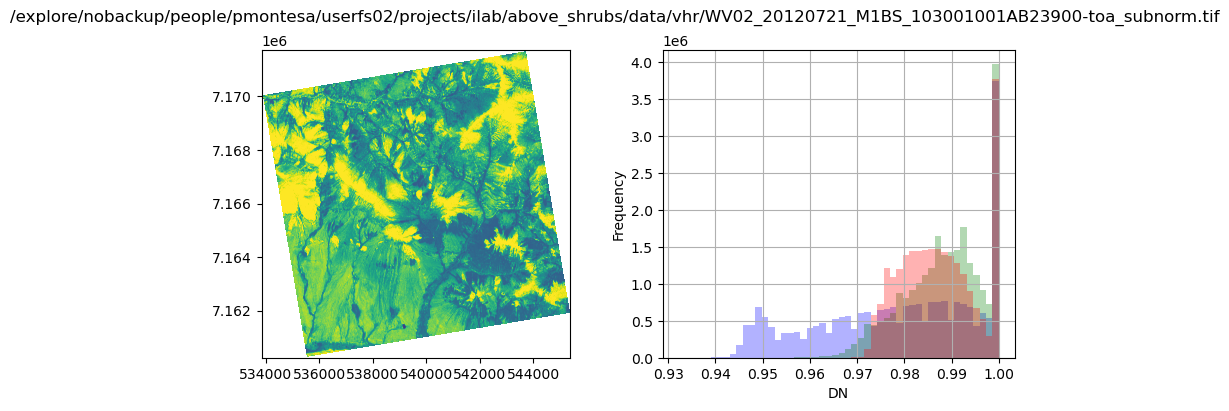

In [23]:
fn_clip_geomlist(r_fn, geom_list, nodata_value=None)

/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs/data/WV02_20120721_M1BS_103001001AB23900-toa_sub.tif
4
(4, 5753, 5761)
(1054.0, 1352.0)
(873.0, 1161.0)
(452.0, 1017.0)
(2478.0, 4274.0)
/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs/data/WV02_20120721_M1BS_103001001AB23900-toa_subnorm.tif
3
(3, 5753, 5761)
(0.976503849029541, 1.0)
(0.9763849973678589, 1.0)
(0.9514837265014648, 1.0)


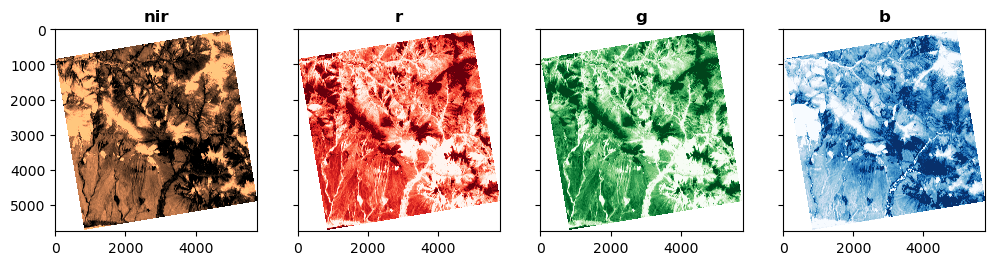

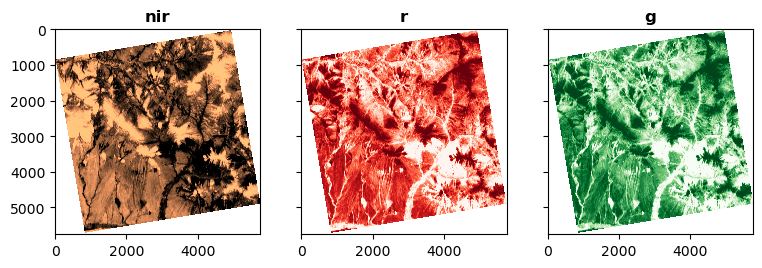

In [169]:
COMPARE_COMPOSITE_BANDS(r_sub_fn, -10001.0, ['nir','r','g','b'], ['copper','Reds','Greens','Blues'])
COMPARE_COMPOSITE_BANDS(r_subnorm_fn, 0, ['nir','r','g'], ['copper','Reds','Greens'])

#### Run through SR-Lite

In [24]:
r_fn_sr = '/explore/nobackup/projects/ilab/data/srlite/products/srlite_1.0.1/Alaska/srlite-1.0.1-rma-alaska-4bands/WV02_20120721_M1BS_103001001AB23900-sr-02m.tif'

Source file:	/explore/nobackup/projects/ilab/data/srlite/products/srlite_1.0.1/Alaska/srlite-1.0.1-rma-alaska-4bands/WV02_20120721_M1BS_103001001AB23900-sr-02m.tif
Clipping...
Matching output nodata to source: -9999.0
Output metadata:
{'driver': 'GTiff', 'interleave': 'band', 'tiled': True, 'blockxsize': 256, 'blockysize': 256, 'compress': 'lzw', 'nodata': -9999.0, 'dtype': 'float32', 'count': 4, 'height': 5753, 'width': 5761, 'transform': Affine(2.0, 0.0, 533855.0,
       0.0, -2.0, 7171745.0), 'crs': CRS.from_epsg(32603)}


('/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs/data/vhr/WV02_20120721_M1BS_103001001AB23900-sr-02m_sub.tif',
 '/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs/data/vhr/WV02_20120721_M1BS_103001001AB23900-sr-02m_subnorm.tif')

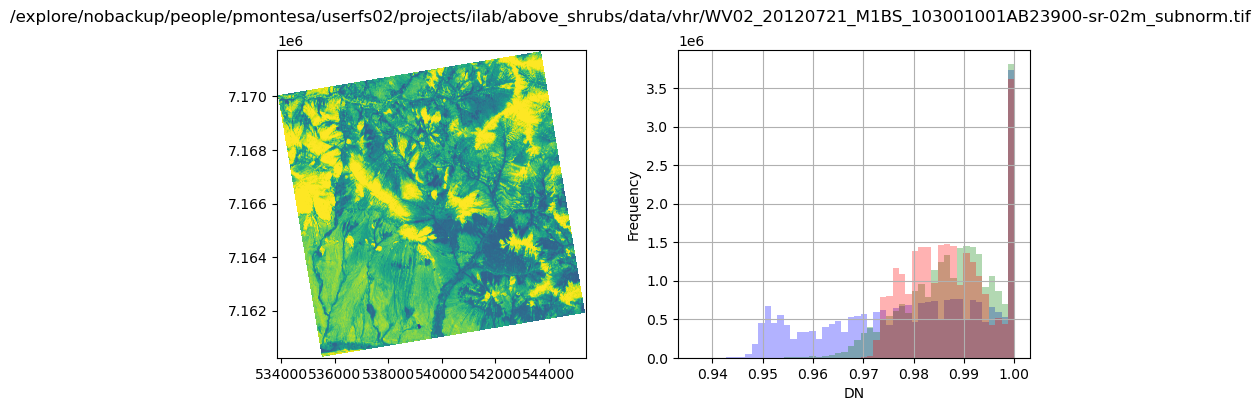

In [25]:
fn_clip_geomlist(r_fn_sr, geom_list, nodata_value = None)

In [26]:
fn = '/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs/data/vhr/WV02_20120721_M1BS_103001001AB23900-sr-02m_subkmeans.tif'

In [27]:
fn_clip_geomlist(fn, geom_list, nodata_value = None)

Source file:	/explore/nobackup/people/pmontesa/userfs02/projects/ilab/above_shrubs/data/vhr/WV02_20120721_M1BS_103001001AB23900-sr-02m_subkmeans.tif
Clipping...
Matching output nodata to source: None
Output metadata:
{'driver': 'GTiff', 'interleave': 'band', 'tiled': True, 'blockxsize': 256, 'blockysize': 256, 'compress': 'lzw', 'nodata': None, 'dtype': 'float32', 'count': 1, 'height': 5753, 'width': 5761, 'transform': Affine(2.0, 0.0, 533855.0,
       0.0, -2.0, 7171745.0), 'crs': CRS.from_epsg(32603)}


IndexError: index 1 is out of bounds for axis 0 with size 1

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 5761, 'height': 5753, 'count': 1, 'crs': CRS.from_epsg(32603), 'transform': Affine(2.0, 0.0, 533855.0,
       0.0, -2.0, 7171745.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


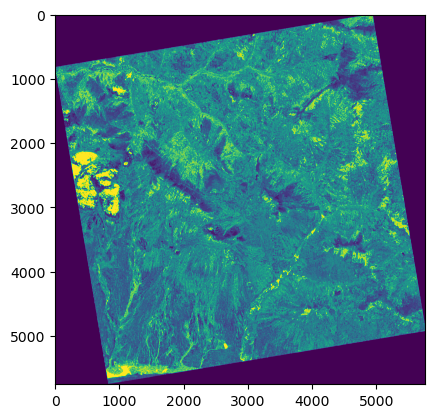

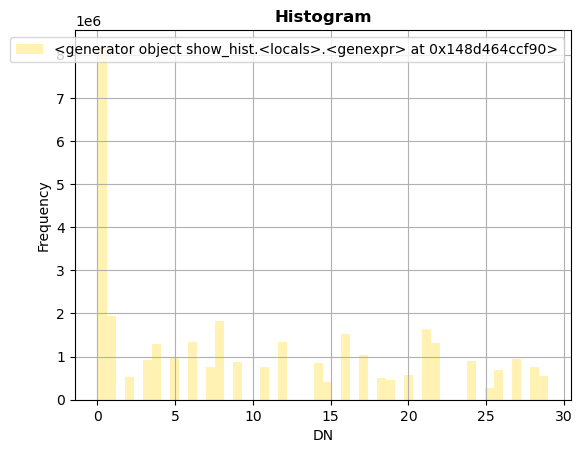

In [39]:
with rasterio.open(fn, mode='r') as dataset:
    print(dataset.profile)
    from rasterio.plot import show_hist
    import contextily as ctx
    ma = np.ma.masked_array(dataset.read(1))
    ma[ma >= 250] = 0
    show(ma)

    show_hist(
        ma, bins=50, lw=0.0, stacked=False, alpha=0.3,
        histtype='stepfilled', title="Histogram")